# Matplotlib base

In [1]:
%matplotlib inline
# %matplotlib notebook
# %matplotlib widget

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
a = np.array([3., 5.6,3.3, 4.7,])

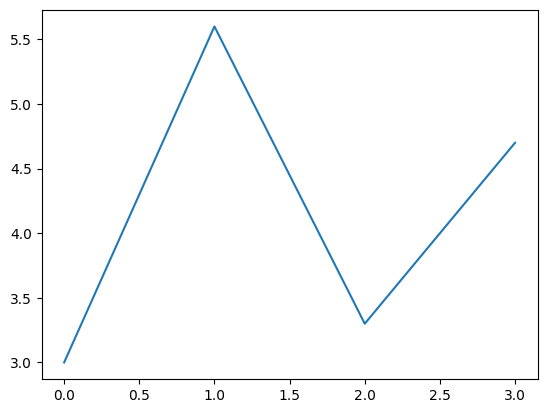

In [4]:
plt.plot(a)

# Il faut avoir une approche objet!!

De mieux choisir explicitement, si on tarce 2 courbes sur 2 figures ou sur une seule.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


Text(0, 0.5, 'weigth')

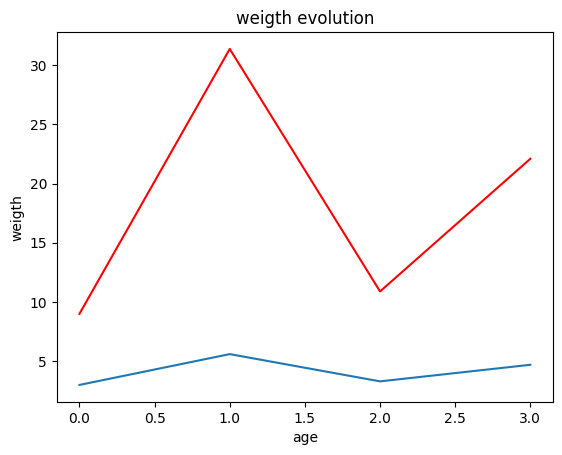

In [5]:
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))
ax.plot(a)
ax.plot(a**2, color='r')
ax.set_title('weigth evolution')
ax.set_xlabel('age')
ax.set_ylabel('weigth')

Celà permet aussi de générer une grille de subplot.

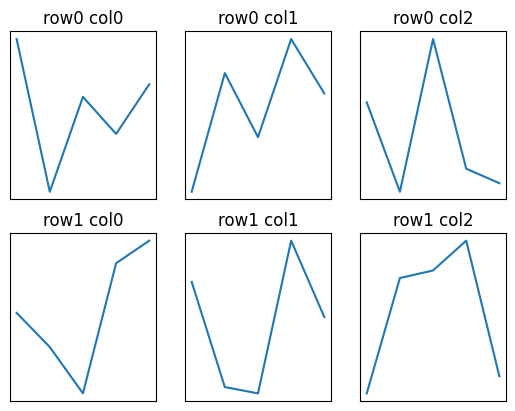

In [6]:
# on fait une grille
fig, axs = plt.subplots(nrows=2, ncols=3)
for r in range(2):
    for c in range(3):
        ax = axs[r,c]
        ax.plot(np.random.rand(5))
        ax.set_title(f'row{r} col{c}')
        ax.set_xticks([])
        ax.set_yticks([])
fig.savefig('mafigure.svg')


# 2 variables

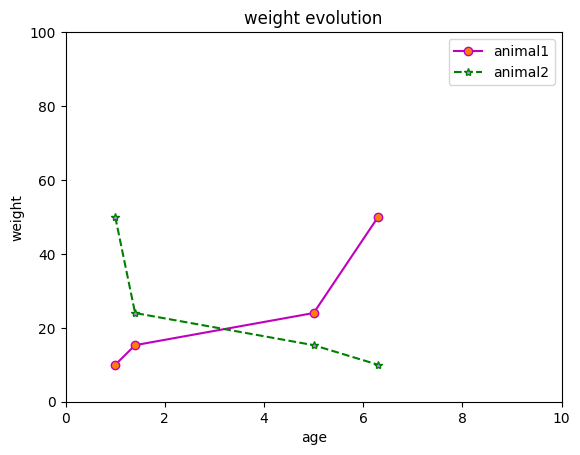

In [7]:
fig, ax = plt.subplots()
a = np.array([1, 1.4, 5, 6.3])
w = np.array([10, 15.3, 24, 50.])
w2 = w[::-1]
ax.plot(a, w, marker='o', linestyle='-', color='m', markerfacecolor='#FF8000', label='animal1')
ax.plot(a, w2, marker='*', linestyle='--', color='g', markerfacecolor='#C280FF', label='animal2')
ax.set_title('weight evolution')
ax.set_xlabel('age')
ax.set_ylabel('weight')
ax.set_xlim(0,10)
ax.set_ylim(0,100)
ax.legend()

 # scatter plot
 pour un nuage de point c'est identique mais sauf le line style

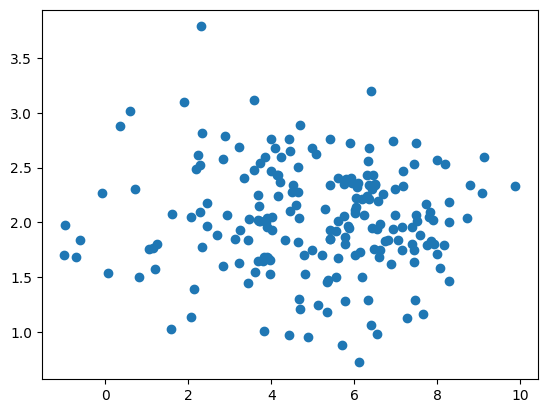

In [8]:
fig, ax = plt.subplots()
x = np.random.randn(200)*2+5
y = np.random.randn(200)/2+2
ax.plot(x, y, marker='o', linestyle='None', )


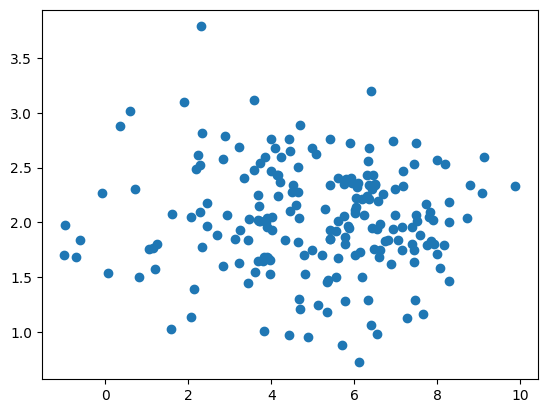

In [9]:
fig, ax = plt.subplots()
ax.scatter(x, y, marker='o')

# histogram
numpy propose une fonction histogram qui renvois count, bins.
Attention le vecteur bins correspond au limites de bins donc count.size = bins.size - 1


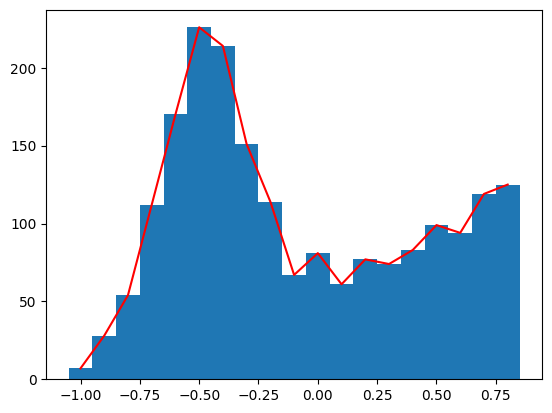

In [10]:
#TODO detail du count
a = np.concatenate([np.random.randn(1000)*.2-.4, np.random.randn(4000)+1.6])
bins = np.arange(-1, 1, .1)
count, bins = np.histogram(a, bins=bins)
fig, ax = plt.subplots()
ax.bar(bins[:-1],count,width=.1)
ax.plot(bins[:-1],count, color='r')

(array([  2.,   0.,   2.,   6.,   8.,  38., 100., 226., 317., 253., 155.,
        104.,  86., 112., 100., 134., 145., 172., 188., 192., 218., 219.,
        254., 213., 211., 211., 196., 184., 154., 131., 121., 126.,  92.,
         75.,  69.,  48.,  34.,  20.,  28.,  18.,  12.,   8.,   7.,   5.,
          3.,   1.,   0.,   0.,   1.,   1.]),
 array([-1.61712931, -1.47757475, -1.33802019, -1.19846562, -1.05891106,
        -0.91935649, -0.77980193, -0.64024737, -0.5006928 , -0.36113824,
        -0.22158367, -0.08202911,  0.05752545,  0.19708002,  0.33663458,
         0.47618915,  0.61574371,  0.75529827,  0.89485284,  1.0344074 ,
         1.17396197,  1.31351653,  1.4530711 ,  1.59262566,  1.73218022,
         1.87173479,  2.01128935,  2.15084392,  2.29039848,  2.42995304,
         2.56950761,  2.70906217,  2.84861674,  2.9881713 ,  3.12772586,
         3.26728043,  3.40683499,  3.54638956,  3.68594412,  3.82549868,
         3.96505325,  4.10460781,  4.24416238,  4.38371694,  4.5232715 ,
 

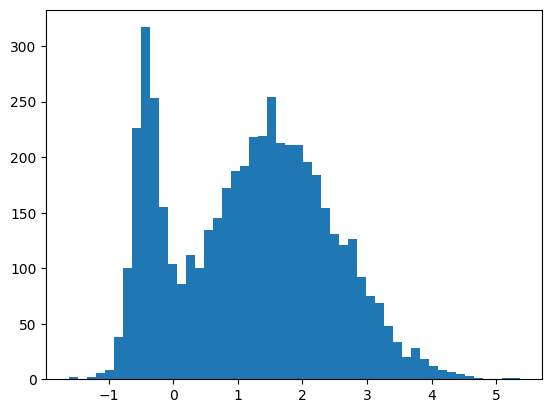

In [11]:
#plus simplement
fig, ax = plt.subplots()
ax.hist(a, bins=50)

# image

In [31]:
# generation des data : une belle boite d'oeuf vu du dessus
x = np.cos(np.linspace(0, 4*np.pi, 100))
y = np.sin(np.linspace(0, 4*np.pi, 100))
X,Y = np.meshgrid(x,y)
data = Y*X

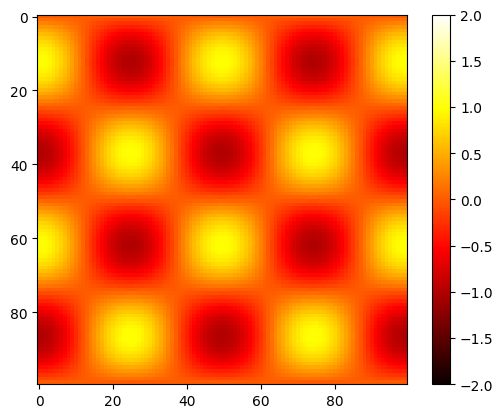

In [32]:
# attention interpolation
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='hot', interpolation='nearest')
im.set_clim(-2, 2)
fig.colorbar(im, ax=ax)

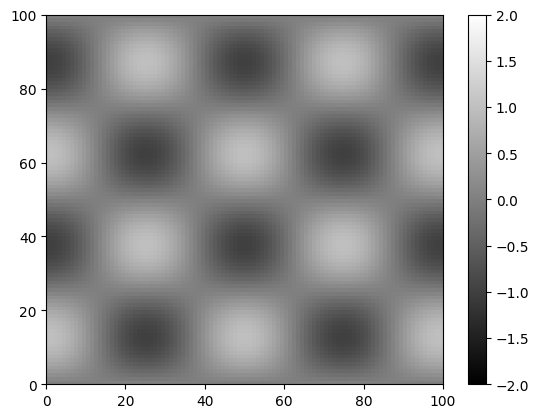

In [40]:
fig, ax = plt.subplots()
im = ax.pcolormesh(data, cmap='gray',)
im.set_clim(-2, 2)
fig.colorbar(im, ax=ax)

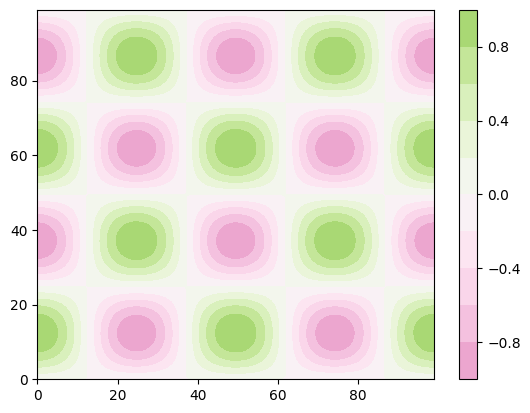

In [35]:
fig, ax = plt.subplots()
im = ax.contourf(data, cmap='PiYG', levels=9)
im.set_clim(-2, 2)
fig.colorbar(im, ax=ax)

# fill_between

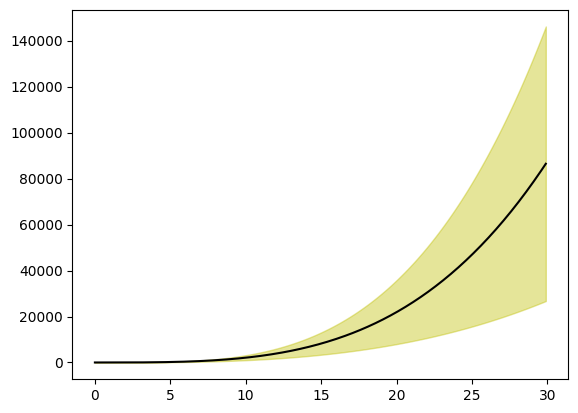

In [36]:
fig, ax = plt.subplots()
x = np.arange(0,30, .1)
y1 = x**3
y2 = x**3.5
m = (y1 + y2)/2

ax.fill_between(x, y1, y2, color='y', alpha=.4)
ax.plot(x, m, color='k')


# Excercice 1


Créer un signal sinusoidal de frequence 5Hz sur l'interval  0-3s

Aide : il faut créer un vecteur **temps**

Frequence echantillonage de 1000Hz


# Solution 1

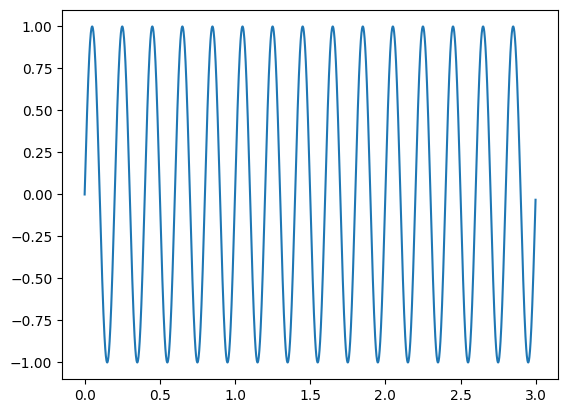

In [37]:
freq = 5.
sample_rate = 1000.
duration = 3.
times = np.arange(0, duration, 1/sample_rate)

sig = np.sin(times * 2 * np.pi * freq)

fig, ax = plt.subplots()
ax.plot(times, sig)



# exercice 2

Idem exercice 1 mais avec du bruit blanc.



# Solution 2

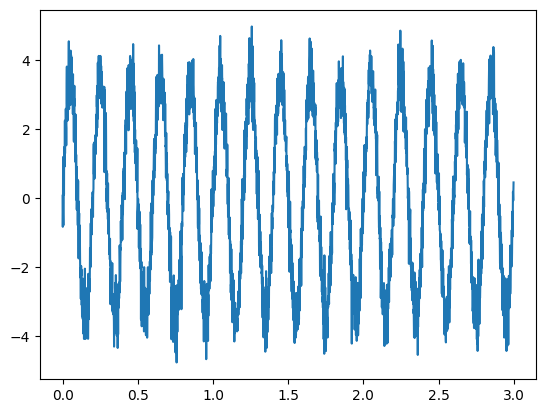

In [38]:
freq = 5.
sample_rate = 1000
times = np.arange(0, 3, 1./sample_rate)
sig = np.sin(2*np.pi*freq*times) * 3.5
noise = np.random.randn(sig.shape[0]) * .5
sig = sig + noise
fig, ax = plt.subplots()
ax.plot(times, sig)



# excerice 3

  * Générer 9 signaux sinusoidaux de frequence 5Hz entre 0 et 3.s.
  * Chaque signal a niveau de bruit de plus en plus grand (faire un peu comme on veut)
  * Sur la figure 1 : Afficher chaque signal dans un subplot sur une grille
  * Sur la figure 2 : afficher la moyenne et la std.

# Solution 3

(9, 3000)


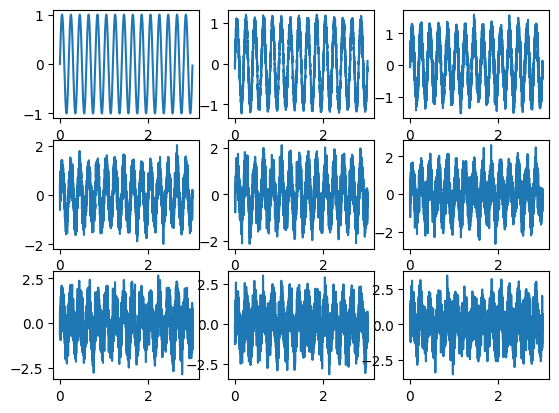

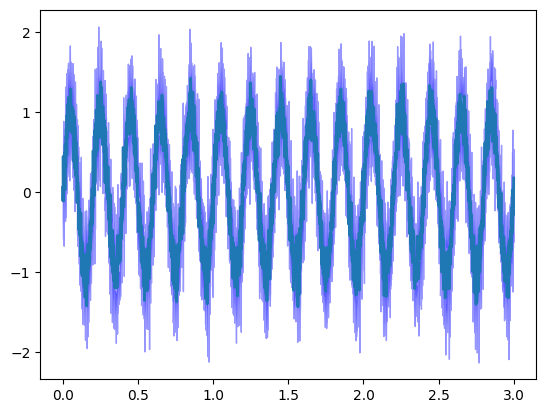

In [39]:
sampling_rate = 1000.
freq = 5.
times = np.arange(0,3, 1./sampling_rate)

#generate data
sigs = []
for i in range(9):
    sig = np.sin(np.pi*2*freq*times)
    noise = np.random.randn(sig.size)*i*.1
    sig = sig + noise
    sigs.append(sig)

fig1, axs = plt.subplots(nrows=3, ncols=3)
#axs = axs.reshape(-1)
axs = axs.flatten()
for i, sig in enumerate(sigs):
    ax = axs[i]
    ax.plot(times, sig)


fig2, ax = plt.subplots()
tab_sigs = np.vstack(sigs)
print(tab_sigs.shape)

m = np.mean(tab_sigs, axis=0)
s = np.std(tab_sigs, axis=0)

ax.plot(times, m, linewidth=2)
ax.fill_between(times, m-s, m+s, color='b', alpha=.4)
